# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# importing libraries for data manuplation
import numpy as np
import pandas as pd

# importing libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# statistical analysis in Python
from scipy import stats

# Model building
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading the dataset

In [5]:
df = pd.read_csv("/content/used_device_data.csv")
df.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


## Data Overview

- Observations
- Sanity checks

In [6]:
df.shape
print(f"NO rows in dataset : {df.shape[0]} \nnumber of columns in dataset : {df.shape[1]}")

NO rows in dataset : 3454 
number of columns in dataset : 15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 neumeric(int and float type) and 4 string(object type) columns in dataset
* Target variable is normalized_used_price which is float type

In [8]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are null values in missing values in many columns

In [9]:
df.duplicated().sum()
print("number of duplicate rows :",df.duplicated().sum())

number of duplicate rows : 0


In [10]:
# Statical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [11]:
numerical_columns = []
catagorical_columns = []

for x in df.columns:
     if df[x].dtype == "object":
        catagorical_columns.append(x)
     else:
         numerical_columns.append(x)
print("neumerical_columns :",numerical_columns)
print("catagorical_columns :",catagorical_columns)

neumerical_columns : ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']
catagorical_columns : ['brand_name', 'os', '4g', '5g']


In [12]:
#copy data incase if required later
copied_df = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.


### Univariate analysis for numerical variables

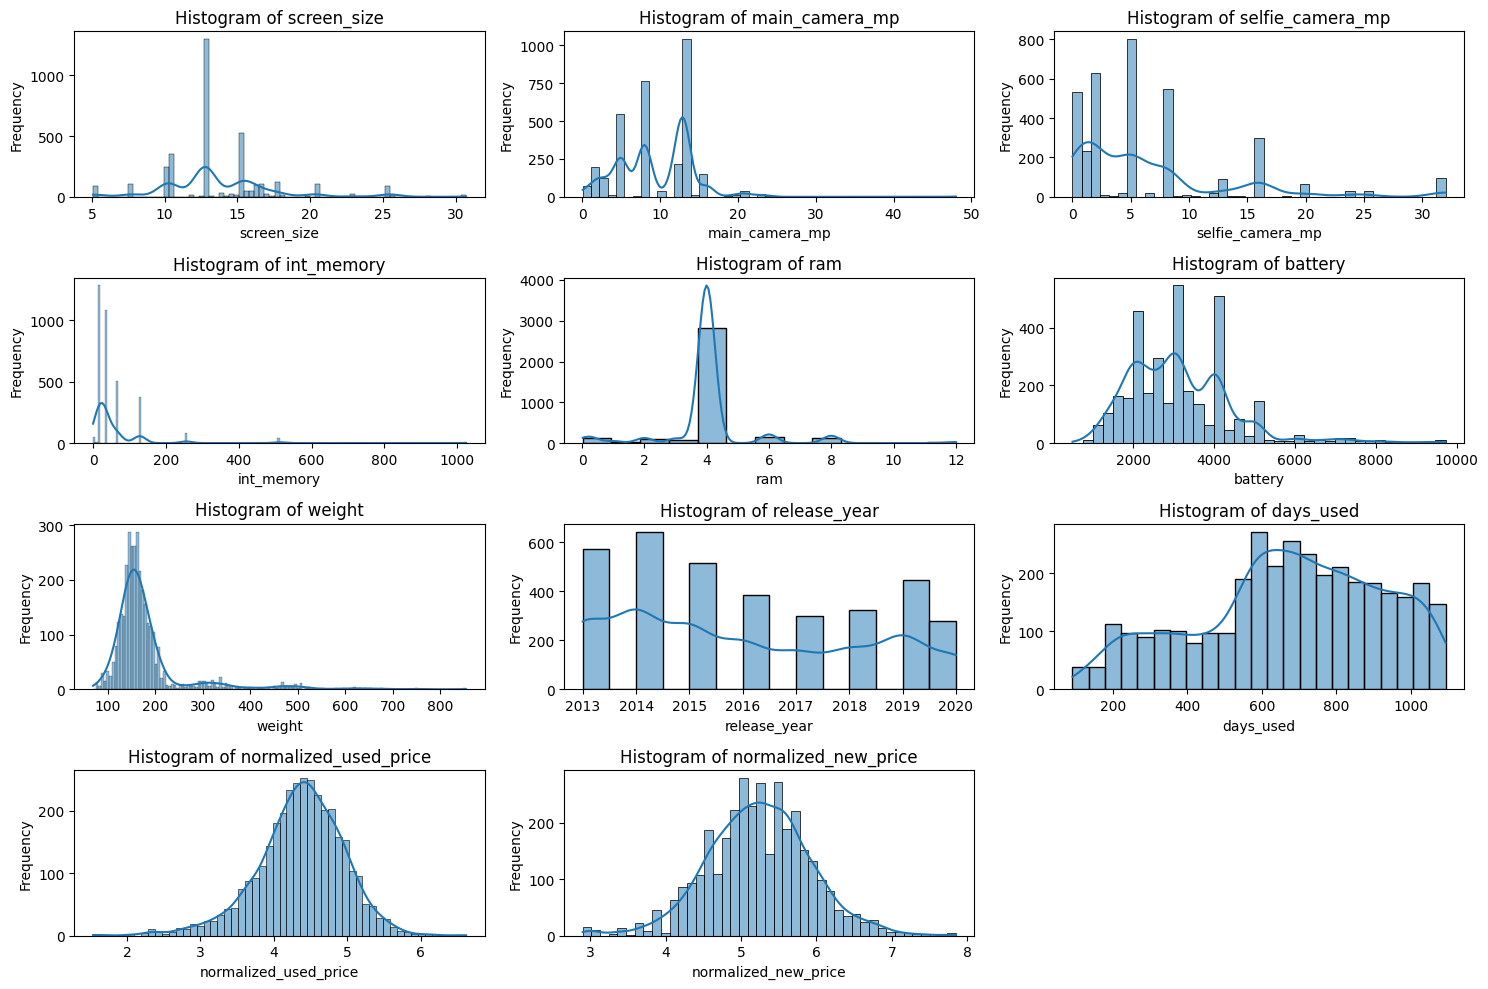

In [13]:
# Plot histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Univariate analysis of categorical variables


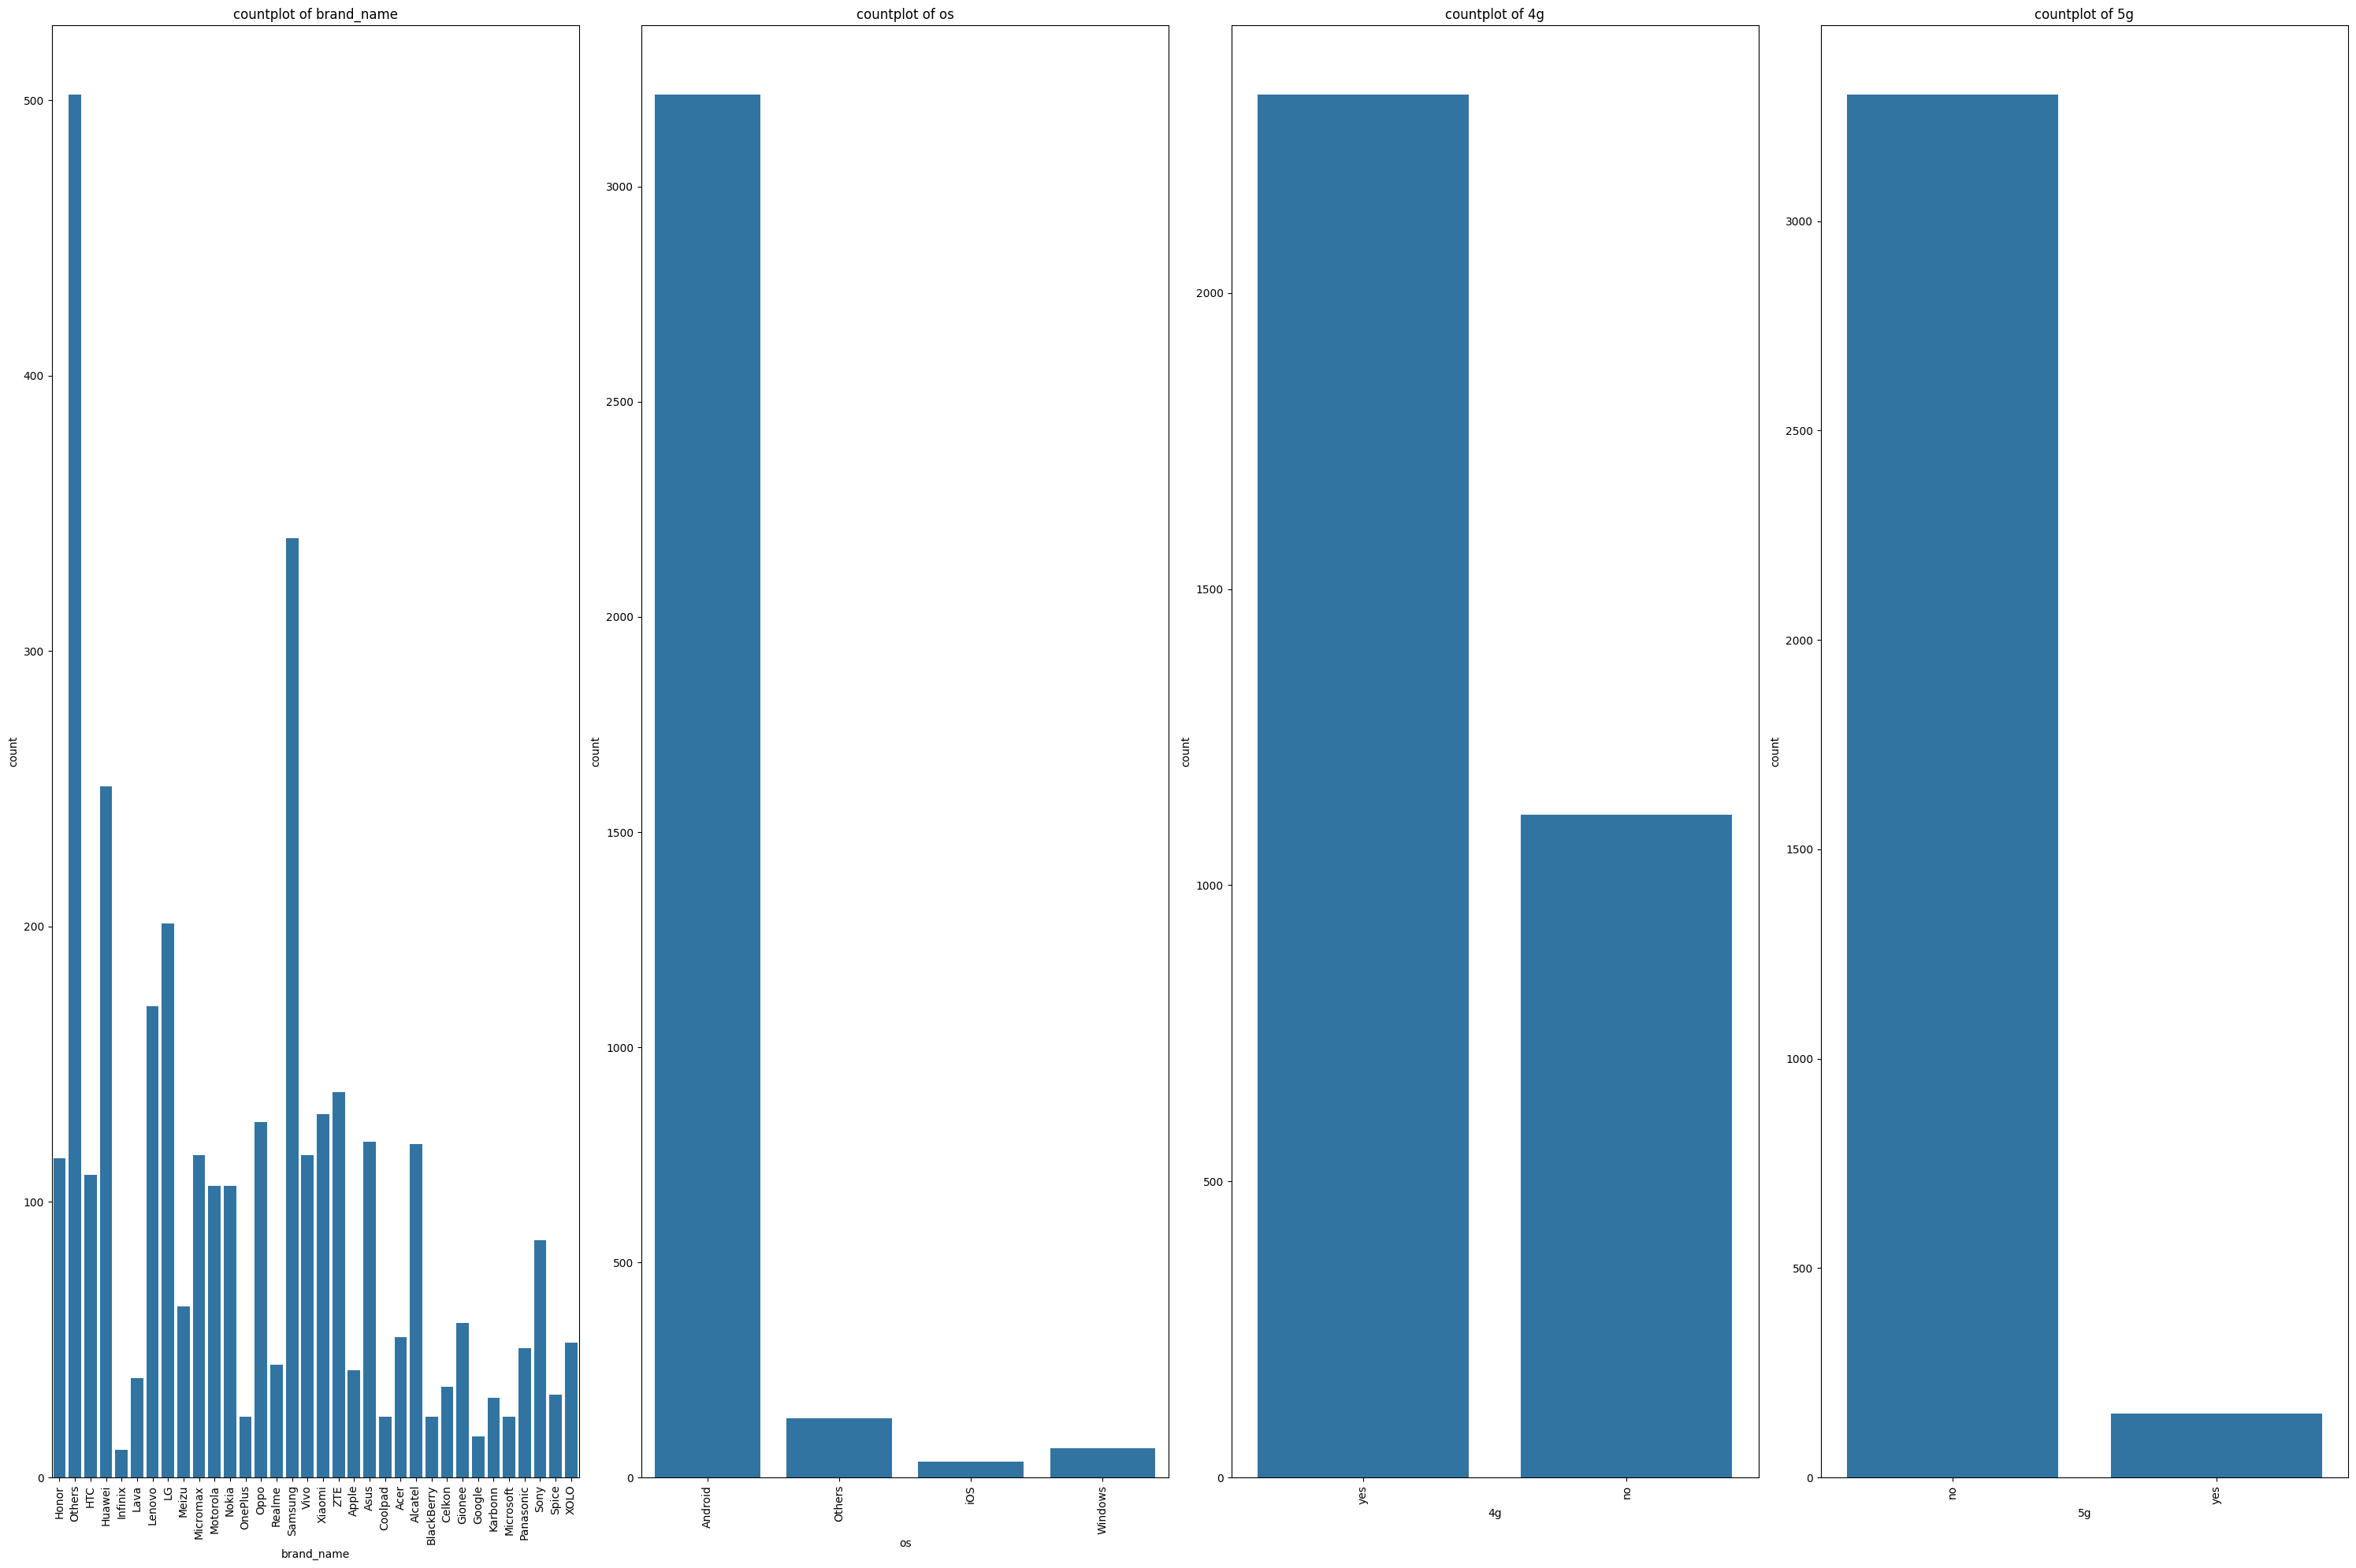

In [14]:
# Plot histograms for categorical variables
plt.figure(figsize=(30, 20))
for i, col in enumerate(catagorical_columns, 1):
    plt.subplot(1,4,i)
    sns.countplot(data=df,x=col)
    plt.xticks(rotation=90)
    plt.title(f"countplot of {col}")
    plt.xlabel(col)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

### Multivariate Analysis

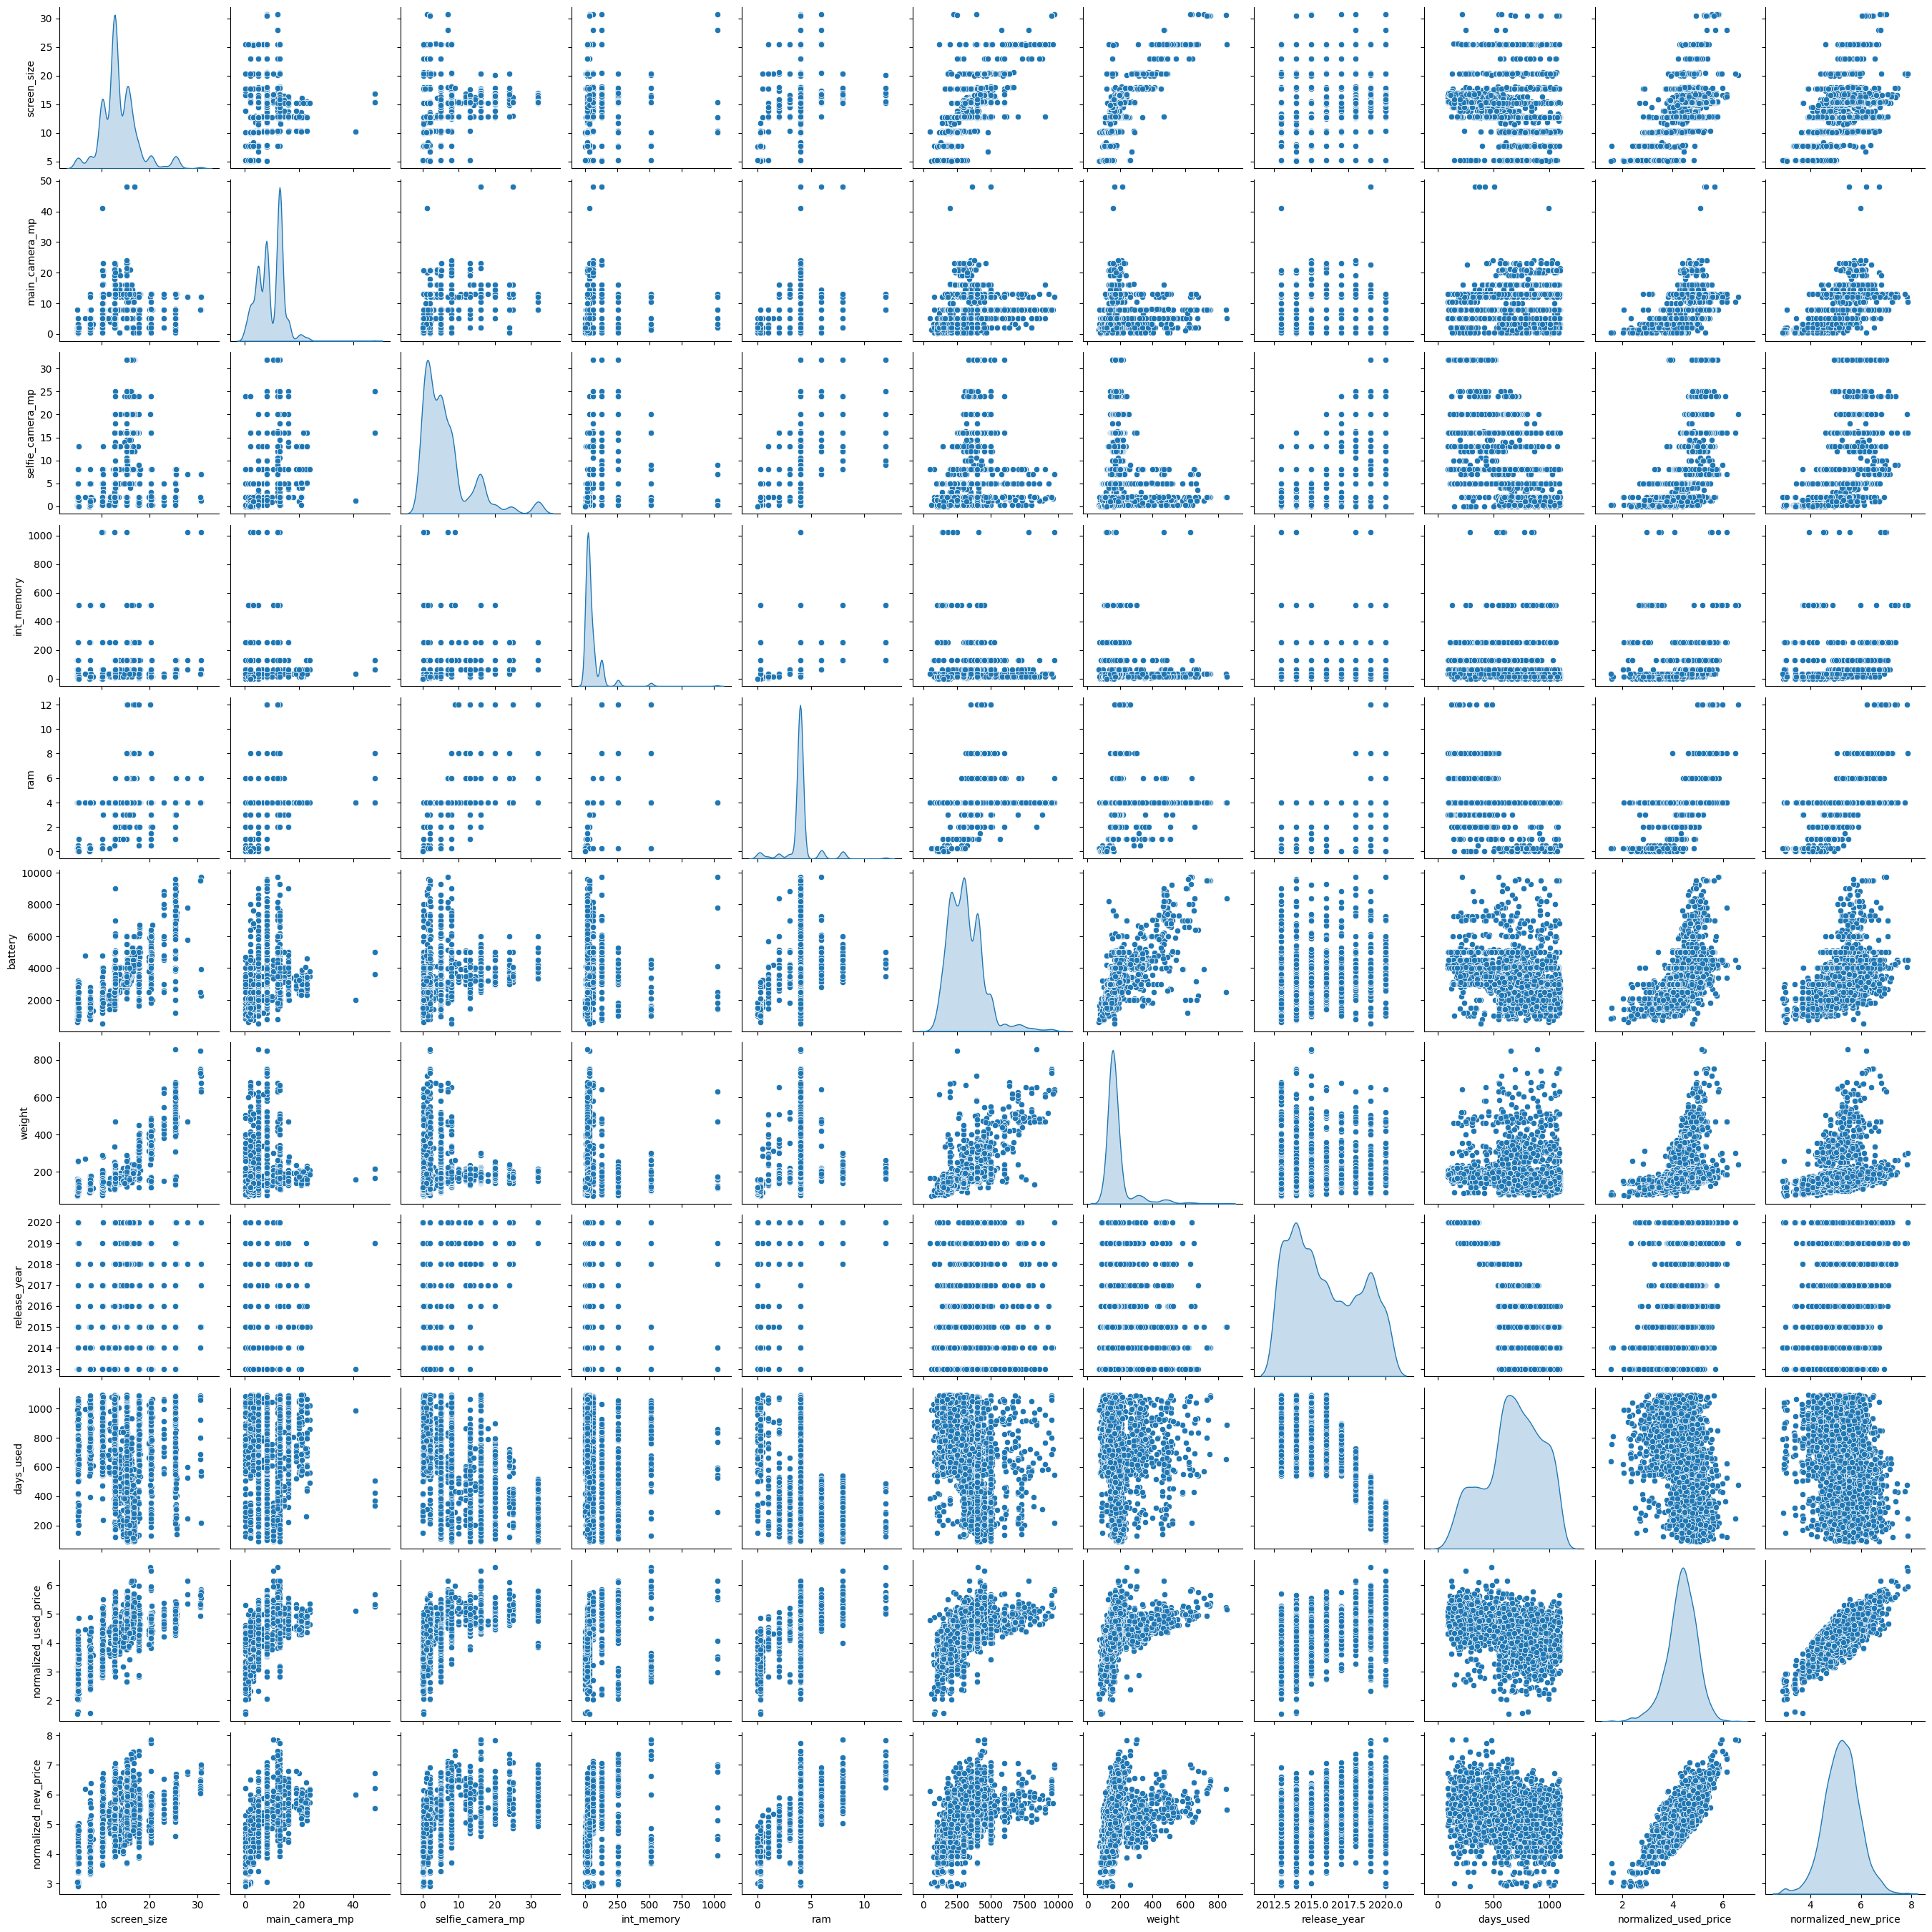

In [15]:
sns.pairplot(data=df,diag_kind="kde")

<Axes: >

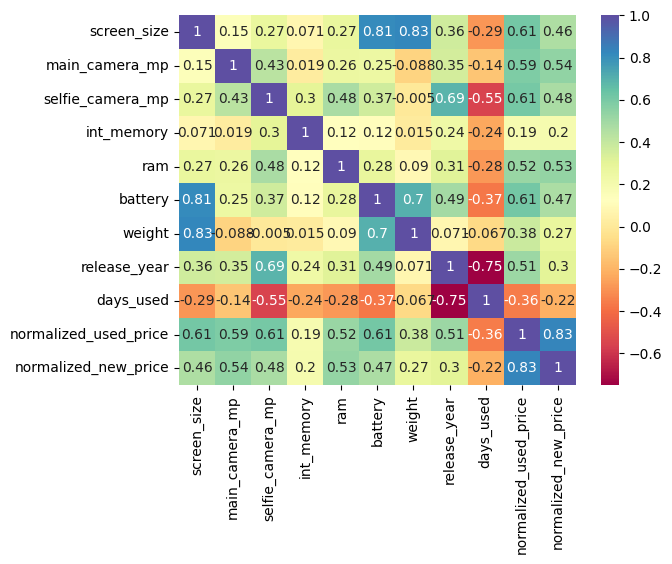

In [16]:
sns.heatmap(data=df[numerical_columns].corr(),cmap="Spectral",annot=True)

# distribution of normalized used device prices look like

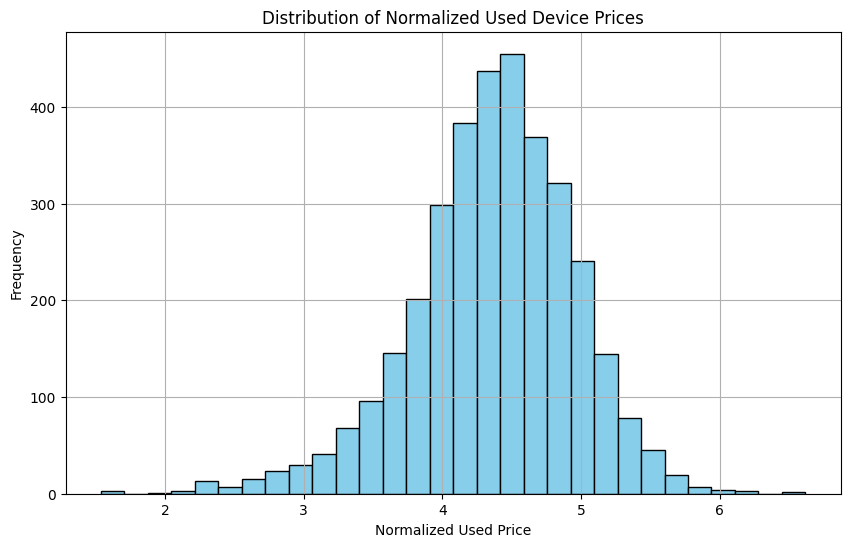

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['normalized_used_price'],bins=30,color='skyblue', edgecolor='black')
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# What percentage of the used device market is dominated by Android devices

In [18]:
total_devices = len(df)
android_devices = len(df[df['os'] == 'Android'])

percentage_android_market_share = (android_devices / total_devices) * 100

print(f'The percentage of the used device market dominated by Android devices is: {percentage_android_market_share :.2f}%')

The percentage of the used device market dominated by Android devices is: 93.05%


#Amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand

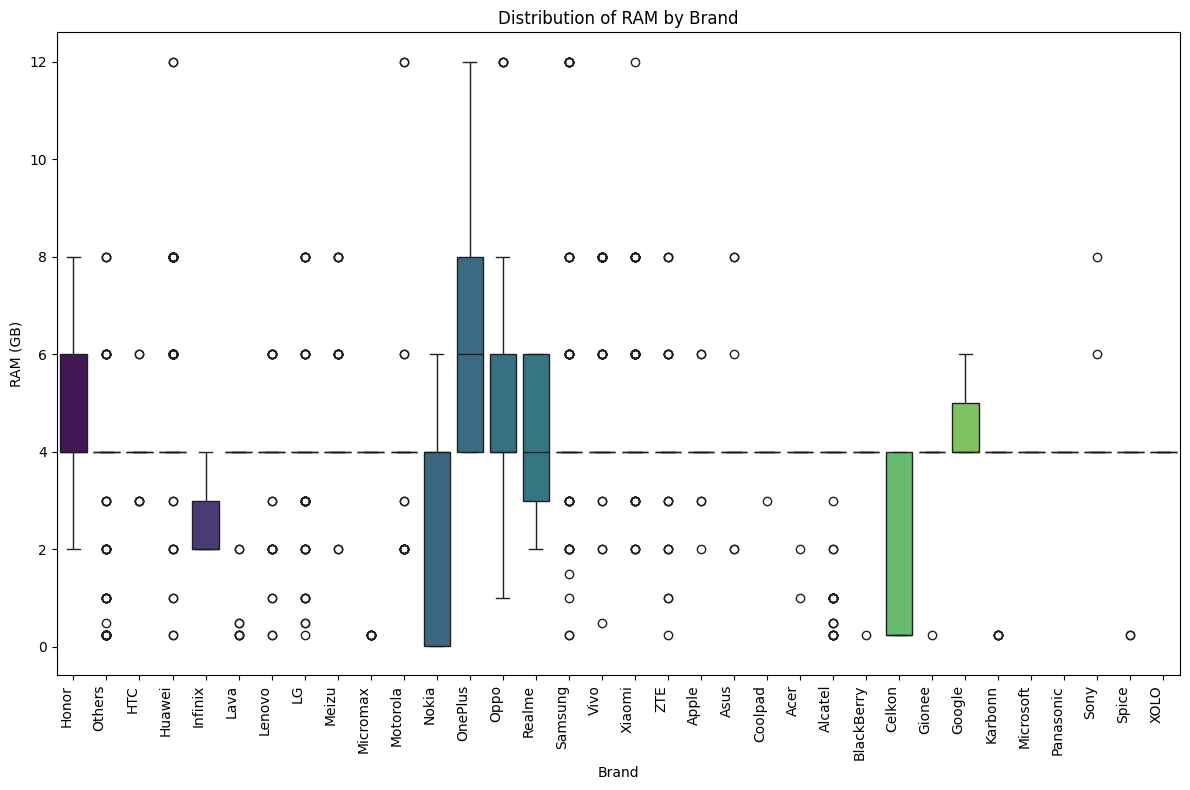

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand_name', y='ram', data=df, palette='viridis')
plt.title('Distribution of RAM by Brand')
plt.xlabel('Brand')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [18]:
ram_by_brand_name = df.groupby("brand_name").mean("ram")
print(ram_by_brand_name["ram"])

brand_name
Acer          3.901961
Alcatel       3.407025
Apple         4.000000
Asus          4.049180
BlackBerry    3.829545
Celkon        1.613636
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.603448
Huawei        4.655378
Infinix       2.600000
Karbonn       3.353448
LG            3.936567
Lava          3.277778
Lenovo        3.885965
Meizu         4.451613
Micromax      3.679487
Microsoft     4.000000
Motorola      3.943396
Nokia         2.420294
OnePlus       6.363636
Oppo          4.961240
Others        3.777888
Panasonic     4.000000
Realme        4.195122
Samsung       4.199413
Sony          4.069767
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.583333
ZTE           4.023214
Name: ram, dtype: float64


# Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches

In [20]:
large_screen_df = df[df['screen_size'] > 6]


brand_counts = large_screen_df['brand_name'].value_counts()


print("Number of phones and tablets with a screen size larger than 6 inches for each brand:")
print(brand_counts)

Number of phones and tablets with a screen size larger than 6 inches for each brand:
Others        479
Samsung       334
Huawei        251
LG            197
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Vivo          117
Honor         116
Alcatel       115
HTC           110
Micromax      108
Motorola      106
Sony           86
Nokia          72
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Spice          30
Karbonn        29
Celkon         25
Coolpad        22
OnePlus        22
Microsoft      22
BlackBerry     21
Google         15
Infinix        10
Name: brand_name, dtype: int64


# A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands

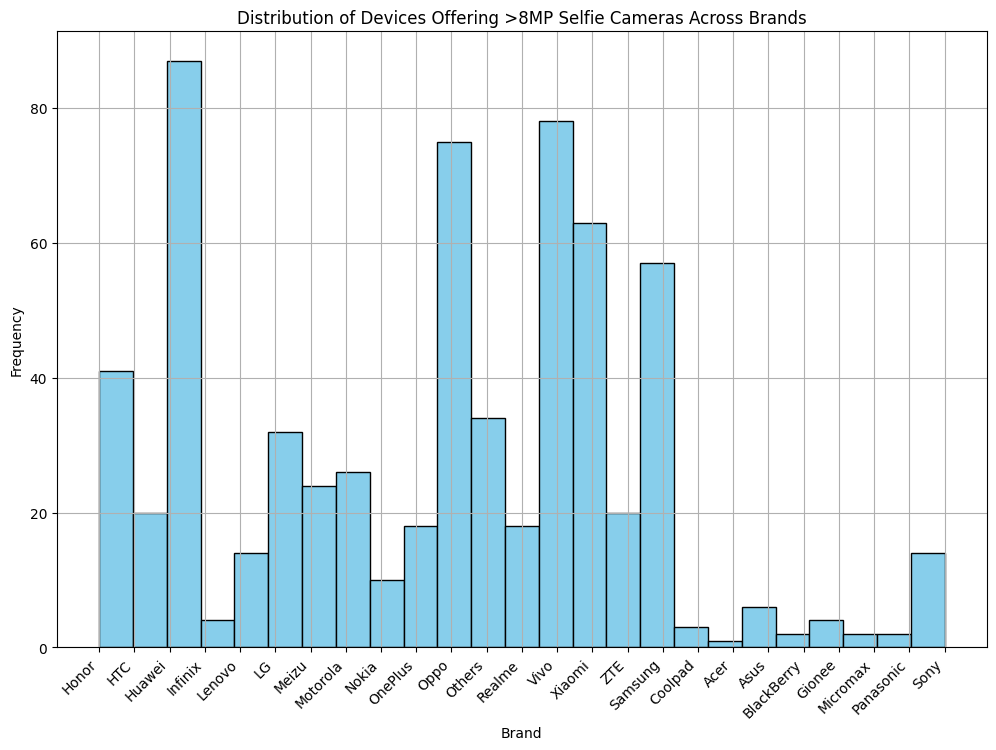

In [21]:
high_resolution_selfie_df = df[df['selfie_camera_mp'] > 8]

plt.figure(figsize=(12, 8))
plt.hist(high_resolution_selfie_df['brand_name'], bins=len(high_resolution_selfie_df['brand_name'].unique()), color='skyblue', edgecolor='black')
plt.title('Distribution of Devices Offering >8MP Selfie Cameras Across Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Data Preprocessing

- Missing value treatment

In [22]:
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].mode().iloc[0])
df["selfie_camera_mp"] = df["selfie_camera_mp"].fillna(df["selfie_camera_mp"].mode().iloc[0])
df["int_memory"] = df["int_memory"].fillna(df["int_memory"].mode().iloc[0])
df["ram"] = df["ram"].fillna(df["ram"].mode().iloc[0])
df["battery"] = df["battery"].fillna(df["battery"].mode().iloc[0])
df["weight"] = df["weight"].fillna(df["weight"].median())

In [24]:
print(df.isnull().sum())

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


- Outlier detection and treatment

In [23]:
z_scores = stats.zscore(df[numerical_columns])
outliers = (np.abs(z_scores) > 3)


In [24]:
for col in numerical_columns:
    lower_limit = df[col].quantile(0.05)  # Adjust as needed
    upper_limit = df[col].quantile(0.95)  # Adjust as needed
    df[col] = np.where(outliers[col], np.where(df[col] < lower_limit, lower_limit, upper_limit), df[col])


- Preparing data for modeling

In [25]:
# splitting the data into the dependent and independent variables
X = df.drop("normalized_used_price",axis=1)
y = df["normalized_used_price"]

In [26]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [27]:
#splitting into train and test set forsklearn
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=1)

In [28]:
#For model building using OLS Library
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Building - Linear Regression

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
lr_model.score(X_test,y_test)

0.8304251718313245

####Lets perform same using OLS regression method.

In [31]:
olsmodel = sm.OLS(y_train1, x_train1).fit()
print(olsmodel.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.997
Model:                               OLS   Adj. R-squared (uncentered):              0.997
Method:                    Least Squares   F-statistic:                          1.916e+04
Date:                   Sun, 28 Jan 2024   Prob (F-statistic):                        0.00
Time:                           14:20:59   Log-Likelihood:                          191.46
No. Observations:                   2417   AIC:                                     -286.9
Df Residuals:                       2369   BIC:                                     -8.985
Df Model:                             48                                                  
Covariance Type:               nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]


1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.997**, which is quite good.


## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function which will print out all the above metrics in one go.

In [32]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [33]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train1, y_train1)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.223543,0.17536,0.837643,0.834352,4.145627


In [35]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test1, y_test1)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234882,0.183697,0.829837,0.82157,4.347285


## Actionable Insights and Recommendations

The model is able to explain ~83% of the variation in the data

- The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

- The MAPE on the test set suggests we can predict within 4.34% of the normalized used price

- Hence, we can conclude the model is good for prediction as well as inference purposes


